### introduction

I will be using two datasets in this analysis. One of them is latest world happines report of 2021 and the other one contains data from previous years.

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt 
import seaborn as sns 
import matplotlib as mpl



import plotly 
import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as py
from plotly.offline import iplot
from plotly.subplots import make_subplots
import plotly.figure_factory as ff


In [3]:
df_2021     = pd.read_csv('world-happiness-report-2021.csv')
df_history  = pd.read_csv('world-happiness-report.csv')

- Let's check statistical information of 2021 data.

In [4]:
df_2021.describe()

,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
count,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,1.490000e+02,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000
mean,5.532839,0.058752,5.648007,5.417631,9.432208,0.814745,64.992799,0.791597,-0.015134,0.727450,2.430000e+00,0.977161,0.793315,0.520161,0.498711,0.178047,0.135141,2.430329
std,1.073924,0.022001,1.054330,1.094879,1.158601,0.114889,6.762043,0.113332,0.150657,0.179226,5.347044e-15,0.404740,0.258871,0.213019,0.137888,0.098270,0.114361,0.537645
min,2.523000,0.026000,2.596000,2.449000,6.635000,0.463000,48.478000,0.382000,-0.288000,0.082000,2.430000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.648000
25%,4.852000,0.043000,4.991000,4.706000,8.541000,0.750000,59.802000,0.718000,-0.126000,0.667000,2.430000e+00,0.666000,0.647000,0.357000,0.409000,0.105000,0.060000,2.138000
50%,5.534000,0.054000,5.625000,5.413000,9.569000,0.832000,66.603000,0.804000,-0.036000,0.781000,2.430000e+00,1.025000,0.832000,0.571000,0.514000,0.164000,0.101000,2.509000
75%,6.255000,0.070000,6.344000,6.128000,10.421000,0.905000,69.600000,0.877000,0.079000,0.845000,2.430000e+00,1.323000,0.996000,0.665000,0.603000,0.239000,0.174000,2.794000
max,7.842000,0.173000,7.904000,7.780000,11.647000,0.983000,76.953000,0.970000,0.542000,0.939000,2.430000e+00,1.751000,1.172000,0.897000,0.716000,0.541000,0.547000,3.482000


In [5]:
df_history.describe()

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
count,1949.000000,1949.000000,1913.000000,1936.000000,1894.000000,1917.000000,1860.000000,1839.000000,1927.000000,1933.000000
mean,2013.216008,5.466705,9.368453,0.812552,63.359374,0.742558,0.000103,0.747125,0.710003,0.268544
std,4.166828,1.115711,1.154084,0.118482,7.510245,0.142093,0.162215,0.186789,0.107100,0.085168
min,2005.000000,2.375000,6.635000,0.290000,32.300000,0.258000,-0.335000,0.035000,0.322000,0.083000
25%,2010.000000,4.640000,8.464000,0.749750,58.685000,0.647000,-0.113000,0.690000,0.625500,0.206000
50%,2013.000000,5.386000,9.460000,0.835500,65.200000,0.763000,-0.025500,0.802000,0.722000,0.258000
75%,2017.000000,6.283000,10.353000,0.905000,68.590000,0.856000,0.091000,0.872000,0.799000,0.320000
max,2020.000000,8.019000,11.648000,0.987000,77.100000,0.985000,0.698000,0.983000,0.944000,0.705000


- Now, let's check general information of both dataframes.

In [6]:
df_2021.info()
print()
print("-"*60)
print()
df_history.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 20 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country name                                149 non-null    object 
 1   Regional indicator                          149 non-null    object 
 2   Ladder score                                149 non-null    float64
 3   Standard error of ladder score              149 non-null    float64
 4   upperwhisker                                149 non-null    float64
 5   lowerwhisker                                149 non-null    float64
 6   Logged GDP per capita                       149 non-null    float64
 7   Social support                              149 non-null    float64
 8   Healthy life expectancy                     149 non-null    float64
 9   Freedom to make life choices                149 non-null    float64
 10  Generosity    

In [7]:
# Function that will take an input table with aggregated values to columns, and then create an output table with 
# two columns - the values and the percentage of total values in that column
def missing_values_table(df):
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        return mis_val_table_ren_columns

In [8]:
missing_values_table(df_2021)

Your selected dataframe has 20 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


- looks Great!!
- There is no missing data in our dataset

In [9]:
missing_values_table(df_history)

Your selected dataframe has 11 columns.
There are 8 columns that have missing values.


,Missing Values,% of Total Values
Perceptions of corruption,110,5.6
Generosity,89,4.6
Healthy life expectancy at birth,55,2.8
Log GDP per capita,36,1.8
Freedom to make life choices,32,1.6
Positive affect,22,1.1
Negative affect,16,0.8
Social support,13,0.7


- The other thing is some of the column names are different on each dataframe.

> my interest will be on

    'Country name'
    'Year'
    'Life Ladder'
    'Log GDP per capita'
    'Social support'
    'Healthy life expectancy at birth'
    'Freedom to make life choices'
    'Generosity'
    'Perceptions of corruption'
    'Regional indicator'


In [10]:
df_2021.columns

Index(['Country name', 'Regional indicator', 'Ladder score',
       'Standard error of ladder score', 'upperwhisker', 'lowerwhisker',
       'Logged GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Ladder score in Dystopia',
       'Explained by: Log GDP per capita', 'Explained by: Social support',
       'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption',
       'Dystopia + residual'],
      dtype='object')

In [11]:
df_2021.rename(columns = {"Ladder score":"Life Ladder",
                          "Logged GDP per capita":"Log GDP per capita",
                          "Healthy life expectancy":"Healthy life expectancy at birth"},inplace = True)

In [12]:
df_2021.drop(columns=['Explained by: Healthy life expectancy',
                      'Explained by: Freedom to make life choices',
                      'Explained by: Generosity', 'Explained by: Perceptions of corruption',
                      'Dystopia + residual','Ladder score in Dystopia',
                      'Explained by: Log GDP per capita',
                      'Explained by: Social support','Standard error of ladder score',
                      'lowerwhisker','upperwhisker'] , inplace = True)

In [13]:
df = pd.concat([df_2021,df_history] , axis = 0 , join = "outer" , ignore_index = True)

In [14]:
df.drop(columns = ['Positive affect','Negative affect'] , inplace = True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2098 entries, 0 to 2097
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      2098 non-null   object 
 1   Regional indicator                149 non-null    object 
 2   Life Ladder                       2098 non-null   float64
 3   Log GDP per capita                2062 non-null   float64
 4   Social support                    2085 non-null   float64
 5   Healthy life expectancy at birth  2043 non-null   float64
 6   Freedom to make life choices      2066 non-null   float64
 7   Generosity                        2009 non-null   float64
 8   Perceptions of corruption         1988 non-null   float64
 9   year                              1949 non-null   float64
dtypes: float64(8), object(2)
memory usage: 164.0+ KB


In [16]:
missing_values_table(df)

Your selected dataframe has 10 columns.
There are 8 columns that have missing values.


,Missing Values,% of Total Values
Regional indicator,1949,92.9
year,149,7.1
Perceptions of corruption,110,5.2
Generosity,89,4.2
Healthy life expectancy at birth,55,2.6
Log GDP per capita,36,1.7
Freedom to make life choices,32,1.5
Social support,13,0.6


In [17]:
df.year = df.year.fillna(2021)


- Still there are some missing values. What should we do? Filling those values with mean or median values may be one solution. Or we can just drop those values which is not the best option considering there are at least 110 rows with missing values.
- I will be filling missing values with that country's mean values. That seems like a proper way to me.


In [18]:
missing_values_table(df)

Your selected dataframe has 10 columns.
There are 7 columns that have missing values.


,Missing Values,% of Total Values
Regional indicator,1949,92.9
Perceptions of corruption,110,5.2
Generosity,89,4.2
Healthy life expectancy at birth,55,2.6
Log GDP per capita,36,1.7
Freedom to make life choices,32,1.5
Social support,13,0.6


In [19]:
df.dropna(subset = ['Regional indicator'],inplace = True)

In [20]:
missing_values_table(df)

Your selected dataframe has 10 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


### What Makes a Country Happier?

- First, let's check correlation among the numerical variables in the dataset.

In [21]:
df.corr()

,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,year
Life Ladder,1.000000,0.789760,0.756888,0.768099,0.607753,-0.017799,-0.421140,NaN
Log GDP per capita,0.789760,1.000000,0.785299,0.859461,0.432323,-0.199286,-0.342337,NaN
Social support,0.756888,0.785299,1.000000,0.723256,0.482930,-0.114946,-0.203207,NaN
Healthy life expectancy at birth,0.768099,0.859461,0.723256,1.000000,0.461494,-0.161750,-0.364374,NaN
Freedom to make life choices,0.607753,0.432323,0.482930,0.461494,1.000000,0.169437,-0.401363,NaN
Generosity,-0.017799,-0.199286,-0.114946,-0.161750,0.169437,1.000000,-0.163962,NaN
Perceptions of corruption,-0.421140,-0.342337,-0.203207,-0.364374,-0.401363,-0.163962,1.000000,NaN
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- Happiness score(Life Ladder) has strong level correlation with GDP, Social Support and Healthy life expectancy at birth.
- Freedom to make life choices and happiness score have mide level correlation between them.
- Perception of corruption and happiness score have weak level negative level correlation between them

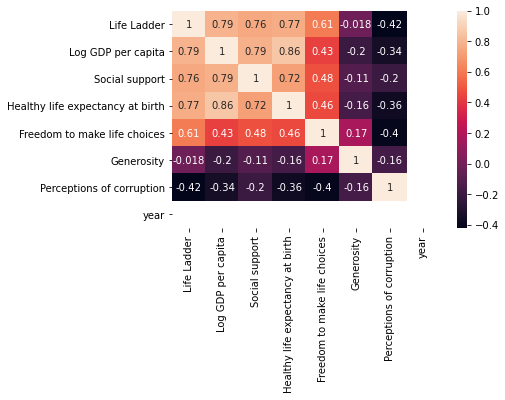

In [22]:
sns.heatmap(df.corr() , annot= True);

- What about happines at the Regional level?


In [23]:
df.groupby('Regional indicator')['Life Ladder'].describe()

,count,mean,std,min,25%,50%,75%,max
Regional indicator,,,,,,,,
Central and Eastern Europe,17.0,5.984765,0.493325,5.101,5.81300,6.0780,6.25500,6.965
Commonwealth of Independent States,12.0,5.467000,0.438116,4.875,5.14475,5.4715,5.74950,6.179
East Asia,6.0,5.810333,0.439913,5.339,5.52700,5.7610,5.91625,6.584
Latin America and Caribbean,20.0,5.908050,0.693467,3.615,5.75200,5.9920,6.31100,7.069
Middle East and North Africa,17.0,5.219765,0.999259,3.658,4.58400,4.8870,6.10600,7.157
North America and ANZ,4.0,7.128500,0.138057,6.951,7.06500,7.1430,7.20650,7.277
South Asia,7.0,4.441857,0.993462,2.523,4.07200,4.9340,5.11150,5.269
Southeast Asia,9.0,5.407556,0.606271,4.426,5.03000,5.3840,5.88000,6.377
Sub-Saharan Africa,36.0,4.494472,0.654892,3.145,4.09850,4.6160,4.99925,6.049


- North America and ANZ has the highest level happines mean on the other hand Sub-Saharan Africa has the least level happines mean.
- Western Europe with the highest level happiness and South Asia least highest levet happiness.
- North America and ANZ has the least standard deviation and almost the same mediand and mean which means happiness there is a normal distribution acroos countires in North America and ANZ.
- Middle East and North Africa with the highest standard deviation.

In [26]:
MiddleEast = df[df['Regional indicator'] == 'Middle East and North Africa']
MiddleEast

,Country name,Regional indicator,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,year
11,Israel,Middle East and North Africa,7.157,10.575,0.939,73.503,0.800,0.031,0.753,2021.0
21,Bahrain,Middle East and North Africa,6.647,10.669,0.862,69.495,0.925,0.089,0.722,2021.0
24,United Arab Emirates,Middle East and North Africa,6.561,11.085,0.844,67.333,0.932,0.074,0.589,2021.0
25,Saudi Arabia,Middle East and North Africa,6.494,10.743,0.891,66.603,0.877,-0.149,0.684,2021.0
46,Kuwait,Middle East and North Africa,6.106,10.817,0.843,66.900,0.867,-0.104,0.736,2021.0
79,Libya,Middle East and North Africa,5.410,9.622,0.827,62.300,0.771,-0.087,0.667,2021.0
103,Turkey,Middle East and North Africa,4.948,10.240,0.822,67.199,0.576,-0.139,0.776,2021.0
105,Morocco,Middle East and North Africa,4.918,8.903,0.560,66.208,0.774,-0.236,0.801,2021.0
108,Algeria,Middle East and North Africa,4.887,9.342,0.802,66.005,0.480,-0.067,0.752,2021.0
110,Iraq,Middle East and North Africa,4.854,9.240,0.746,60.583,0.630,-0.053,0.875,2021.0


In [27]:
MiddleEast.corr()

,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,year
Life Ladder,1.000000,0.869752,0.531680,0.688484,0.724233,0.443936,-0.555662,NaN
Log GDP per capita,0.869752,1.000000,0.456593,0.716207,0.608255,0.442853,-0.540581,NaN
Social support,0.531680,0.456593,1.000000,0.236861,0.219283,0.296184,-0.310128,NaN
Healthy life expectancy at birth,0.688484,0.716207,0.236861,1.000000,0.333798,0.348486,-0.245593,NaN
Freedom to make life choices,0.724233,0.608255,0.219283,0.333798,1.000000,0.136853,-0.626539,NaN
Generosity,0.443936,0.442853,0.296184,0.348486,0.136853,1.000000,-0.412944,NaN
Perceptions of corruption,-0.555662,-0.540581,-0.310128,-0.245593,-0.626539,-0.412944,1.000000,NaN
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



- Even though some similarities can be found with the whole dataset correlation, in Middle East and North Africa has some differences in correlation matrix.
- GDP has more correlation with happiness compared to whole dataset but in a low margin but on the other hand, Generosity has so much more correlation with happines in Middle East and North Africa compared to whole dataset.
- Social support, Healthy life expectancy at birth and Perception of corruption has much lower correlation with happines than whole dataset.
- Freedom to make life choices' correlation almost identical in both datasets.


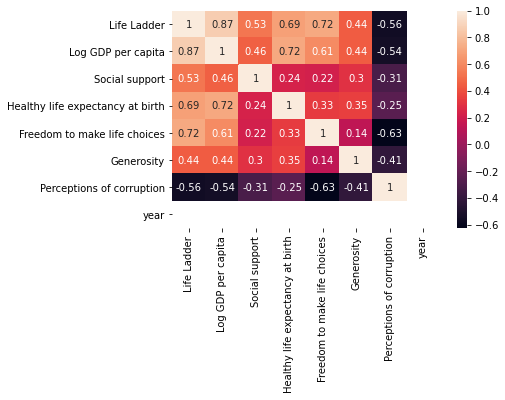

In [30]:
sns.heatmap(MiddleEast.corr() , annot=True);

In [32]:
MiddleEast.describe()

,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,year
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.0
mean,5.219765,9.666118,0.797647,65.609118,0.716471,-0.079765,0.762235,2021.0
std,0.999259,0.927938,0.088192,3.763673,0.138409,0.120297,0.080509,0.0
min,3.658000,7.578000,0.560000,57.122000,0.480000,-0.236000,0.589000,2021.0
25%,4.584000,9.240000,0.750000,62.300000,0.608000,-0.163000,0.714000,2021.0
50%,4.887000,9.584000,0.826000,66.603000,0.749000,-0.104000,0.753000,2021.0
75%,6.106000,10.575000,0.844000,67.201000,0.800000,-0.053000,0.801000,2021.0
max,7.157000,11.085000,0.939000,73.503000,0.932000,0.218000,0.898000,2021.0


C:\Users\UP2store\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



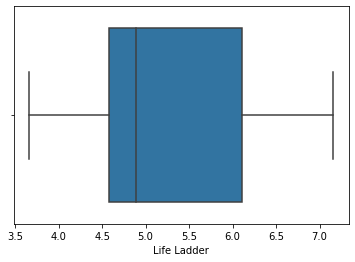

In [34]:
sns.boxplot(MiddleEast['Life Ladder']);

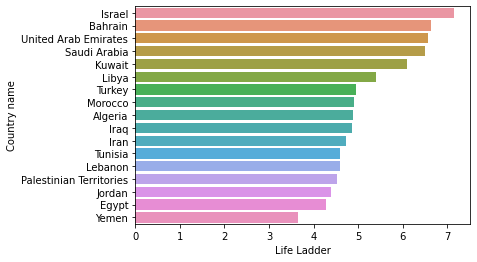

In [37]:
sns.barplot(data = MiddleEast ,x = 'Life Ladder' , y = 'Country name');

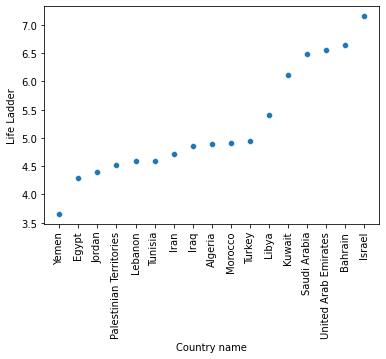

In [43]:
x=MiddleEast.groupby("Country name").mean().sort_values(by="Life Ladder").index
y=MiddleEast.groupby("Country name").mean().sort_values(by="Life Ladder")["Life Ladder"]
sns.scatterplot(x = MiddleEast.groupby("Country name").mean().sort_values(by="Life Ladder").index ,y = MiddleEast.groupby("Country name").mean().sort_values(by="Life Ladder")["Life Ladder"])
plt.xticks(rotation = 90);

- Is really the money answer to our happiness? Let's check!

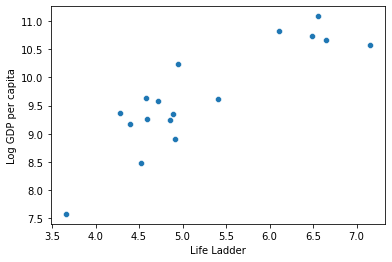

In [45]:
sns.scatterplot(x = MiddleEast[MiddleEast['year'] == 2021]['Life Ladder'], 
                y = MiddleEast[MiddleEast['year'] == 2021]['Log GDP per capita']
    ,data = MiddleEast)
plt.show()

The answer the question I asked before is yes. GDP has really strong correlation with happines score. We can see this from scatterplot.